In [ ]:
pip install sktime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/OULAD_analysis/'

In [ ]:
assess = pd.read_csv(path + 'assessments.csv')
course = pd.read_csv(path + 'courses.csv')
stdAssess = pd.read_csv(path + 'studentAssessment.csv')
stdInfo = pd.read_csv(path + 'studentInfo.csv')
stdReg = pd.read_csv(path + 'studentRegistration.csv')
stdVle = pd.read_csv(path + 'studentVle.csv')
vle = pd.read_csv(path + 'vle.csv')

In [ ]:
assess[assess['code_module']=='AAA']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [ ]:
assess.groupby(['code_module','code_presentation']).count()

id_assessment  assessment_type  date  weight
code_module code_presentation                                              
AAA         2013J                          6                6     5       6
            2014J                          6                6     5       6
BBB         2013B                         12               12    11      12
            2013J                         12               12    11      12
            2014B                         12               12    11      12
            2014J                          6                6     5       6
CCC         2014B                         10               10     8      10
            2014J                         10               10     8      10
DDD         2013B                         14               14    14      14
            2013J                          7                7     7       7
            2014B                          7                7     7       7
            2014J                          7                7     6       7
EEE         2013J                          5                5     5       5
            2014B                          5                5     5       5
            2014J                          5                5     5       5
FFF         2013B                         13               13    13      13
            2013J                         13               13    13      13
            2014B                         13               13    13      13
            2014J                         13               13    13      13
GGG         2013J                         10               10    10      10
            2014B                         10               10    10      10
            2014J                         10               10    10      10

In [ ]:
assess['assessment_type'].value_counts()

assessment_type
TMA     106
CMA      76
Exam     24
Name: count, dtype: int64

1. There are 7 courses : AAA,BBB,CCC,DDD,EEE,FFF,GGG
2. There are 3 types of assessment : TMA(Tutor marked assessment), CMA(Computer marked assessment), Exam
3. 'J' means course starting in Feb, 'B' means course starting in Oct.
4. BBB,DDD,FFF : 2013B&J, 2014B&J / AAA : 2013J, 2014J (only in Feb) / CCC : 2014B, 2014J (only in 2014) / EEE,GGG : 2013J&B, 2014J
5. Usually the grading weight is given separately to Exam with 100%, and sum of TMA and CMA is 100% for each module, code_presentation.
6. The number of assessment and code_presentation differs per each module.
7. The date info is null for Exam

In [ ]:
course

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [ ]:
course['code_module'].value_counts()

code_module
BBB    4
FFF    4
DDD    4
EEE    3
GGG    3
CCC    2
AAA    2
Name: count, dtype: int64

In [ ]:
stdAssess.sort_values('id_student').head(20)

,id_assessment,id_student,date_submitted,is_banked,score
1756,1758,6516,17,0,60.0
2871,1762,6516,210,0,77.0
1970,1759,6516,51,0,48.0
2685,1761,6516,164,0,61.0
2376,1760,6516,116,0,63.0
76301,25348,8462,29,0,93.0
88494,25362,8462,-1,1,93.0
92364,25365,8462,-1,1,87.0
76985,25349,8462,51,0,83.0
90368,25363,8462,-1,1,83.0


In [ ]:
stdInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [ ]:
stdInfo.sort_values('id_student').head(20)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
14394,DDD,2013J,3733,M,South Region,HE Qualification,90-100%,55<=,0,60,N,Withdrawn
383,AAA,2014J,6516,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
17560,DDD,2014J,8462,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
14395,DDD,2013J,8462,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
748,BBB,2013B,23629,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail
2515,BBB,2013J,23632,F,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,60,N,Withdrawn
10593,CCC,2014J,23698,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,120,N,Pass
2516,BBB,2013J,23798,M,Wales,A Level or Equivalent,50-60%,0-35,0,60,N,Distinction
31011,GGG,2014B,24186,F,Yorkshire Region,Lower Than A Level,10-20,0-35,0,30,Y,Pass


In [ ]:
stdInfo['region'].value_counts()

region
Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: count, dtype: int64

In [ ]:
stdInfo['highest_education'].value_counts()

highest_education
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: count, dtype: int64

In [ ]:
stdInfo['age_band'].value_counts()

age_band
0-35     22944
35-55     9433
55<=       216
Name: count, dtype: int64

In [ ]:
stdInfo['num_of_prev_attempts'].value_counts()

num_of_prev_attempts
0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: count, dtype: int64

In [ ]:
stdInfo['studied_credits'].value_counts()

studied_credits
60     16751
120     6328
30      3749
90      3144
180      830
       ...  
370        1
215        1
255        1
65         1
430        1
Name: count, Length: 61, dtype: int64

In [ ]:
stdInfo['disability'].value_counts()

disability
N    29429
Y     3164
Name: count, dtype: int64

In [ ]:
stdInfo['gender'].value_counts()

gender
M    17875
F    14718
Name: count, dtype: int64

In [ ]:
stdInfo['final_result'].value_counts()

final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

In [ ]:
stdInfo['final_result'] = np.where(stdInfo['final_result'] == 'Withdrawn', 1, 0)

In [ ]:
stdInfo['final_result'].value_counts()

final_result
0    22437
1    10156
Name: count, dtype: int64

In [ ]:
region = stdInfo.groupby('region')[['final_result']].mean()
region

,final_result
region,
East Anglian Region,0.301198
East Midlands Region,0.347569
Ireland,0.230574
London Region,0.345149
North Region,0.315414
North Western Region,0.355816
Scotland,0.263204
South East Region,0.307437
South Region,0.300129


In [ ]:
stdInfo = pd.merge(stdInfo, region, how='left', on='region')

In [ ]:
stdInfo = stdInfo.drop('region', axis=1)

In [ ]:
stdInfo.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result_x,final_result_y
0,AAA,2013J,11391,M,HE Qualification,90-100%,55<=,0,240,N,0,0.301198
1,AAA,2013J,28400,F,HE Qualification,20-30%,35-55,0,60,N,0,0.263204
2,AAA,2013J,30268,F,A Level or Equivalent,30-40%,35-55,0,60,Y,1,0.355816
3,AAA,2013J,31604,F,A Level or Equivalent,50-60%,35-55,0,60,N,0,0.307437
4,AAA,2013J,32885,F,Lower Than A Level,50-60%,0-35,0,60,N,0,0.353602


In [ ]:
stdInfo = stdInfo.rename(columns={'final_result_x': 'final_result', 'final_result_y': 'region'})

In [ ]:
stdVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [ ]:
stdInfo_stdVle = pd.merge(stdInfo, stdVle, how='left', on=['id_student','code_module','code_presentation']).sort_values(['id_student','code_module','code_presentation'])

In [ ]:
stdInfo = stdInfo.groupby(['code_module','code_presentation','id_student'])[['gender','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','final_result','region']].first()
stdInfo = pd.get_dummies(stdInfo, drop_first=True)

In [ ]:
stdInfo = stdInfo.reset_index()
stdInfo

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,final_result,region,gender_M,highest_education_HE Qualification,highest_education_Lower Than A Level,...,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y
0,AAA,2013J,11391,0,240,0,0.301198,True,True,False,...,False,False,False,False,False,False,True,False,True,False
1,AAA,2013J,28400,0,60,0,0.263204,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,AAA,2013J,30268,0,60,1,0.355816,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,AAA,2013J,31604,0,60,0,0.307437,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,AAA,2013J,32885,0,60,0,0.353602,False,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,0,30,0,0.251198,False,False,True,...,False,False,False,False,False,False,False,False,False,False
32589,GGG,2014J,2645731,0,30,0,0.301198,False,False,True,...,False,True,False,False,False,False,False,True,False,False
32590,GGG,2014J,2648187,0,30,0,0.300129,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32591,GGG,2014J,2679821,0,30,1,0.307437,False,False,True,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'final_result' is your target and the rest are features
X = stdInfo.drop(['final_result', 'code_module', 'code_presentation', 'id_student'], axis=1)  # dropping the unique key columns and target
y = stdInfo['final_result']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

In [ ]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the DataFrame containing feature importances
print(feature_importances)

                                               importance
region                                           0.351424
studied_credits                                  0.235443
num_of_prev_attempts                             0.080590
gender_M                                         0.059058
age_band_35-55                                   0.042749
highest_education_Lower Than A Level             0.024865
highest_education_HE Qualification               0.022869
disability_Y                                     0.022050
imd_band_30-40%                                  0.019169
imd_band_40-50%                                  0.018405
imd_band_60-70%                                  0.017839
imd_band_10-20                                   0.016400
imd_band_50-60%                                  0.015693
imd_band_20-30%                                  0.015529
imd_band_70-80%                                  0.015412
imd_band_80-90%                                  0.014960
imd_band_90-10

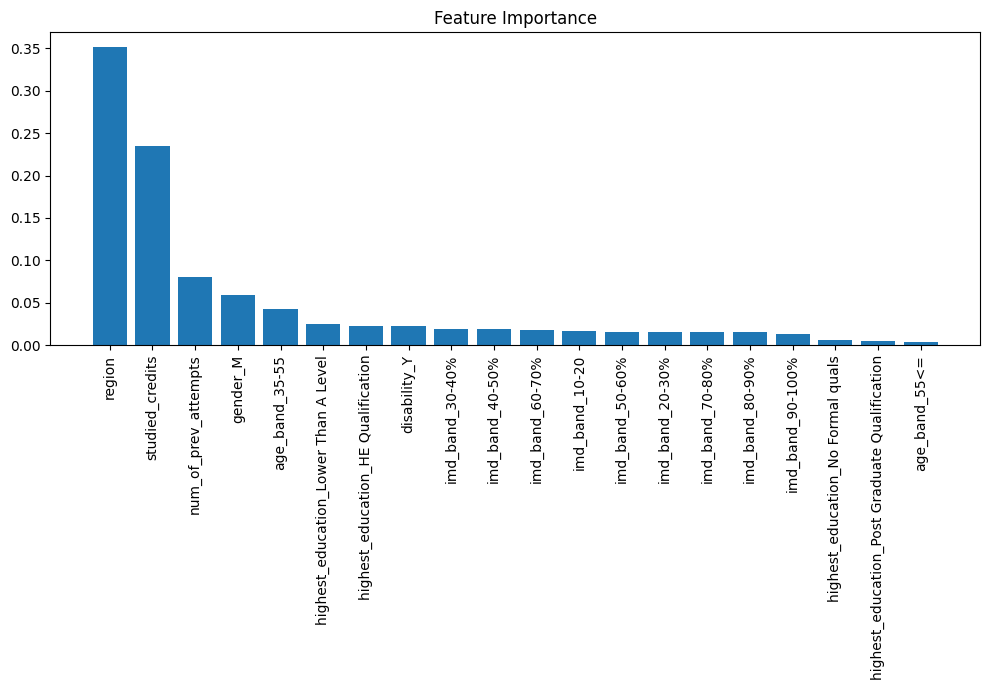

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Initialize RFE with the model and desired number of features
rfe = RFE(model, n_features_to_select=5)  # You can choose how many features you want to keep
rfe.fit(X_train, y_train)

# Combine the boolean selection array with the column names
selected_features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

# Print the dataframe of features and their selection status
print(selected_features_df[selected_features_df['Selected'] == True])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                                 Feature  Selected  Ranking
2                                 region      True        1
5   highest_education_Lower Than A Level      True        1
6      highest_education_No Formal quals      True        1
9                        imd_band_20-30%      True        1
19                          disability_Y      True        1


In [ ]:
stdInfo_new = stdInfo[['code_module','code_presentation','id_student','region','studied_credits','num_of_prev_attempts','gender_M','age_band_35-55','highest_education_Lower Than A Level','highest_education_HE Qualification','disability_Y','final_result']]

In [ ]:
stdInfo_new

,code_module,code_presentation,id_student,region,studied_credits,num_of_prev_attempts,gender_M,age_band_35-55,highest_education_Lower Than A Level,highest_education_HE Qualification,disability_Y,final_result
0,AAA,2013J,11391,0.301198,240,0,True,False,False,True,False,0
1,AAA,2013J,28400,0.263204,60,0,False,True,False,True,False,0
2,AAA,2013J,30268,0.355816,60,0,False,True,False,False,True,1
3,AAA,2013J,31604,0.307437,60,0,False,True,False,False,False,0
4,AAA,2013J,32885,0.353602,60,0,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,0.251198,30,0,False,False,True,False,False,0
32589,GGG,2014J,2645731,0.301198,30,0,False,True,True,False,False,0
32590,GGG,2014J,2648187,0.300129,30,0,False,False,False,False,True,0
32591,GGG,2014J,2679821,0.307437,30,0,False,True,True,False,False,1


In [ ]:
stdInfo_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   code_module                           32593 non-null  object 
 1   code_presentation                     32593 non-null  object 
 2   id_student                            32593 non-null  int64  
 3   region                                32593 non-null  float64
 4   studied_credits                       32593 non-null  int64  
 5   num_of_prev_attempts                  32593 non-null  int64  
 6   gender_M                              32593 non-null  bool   
 7   age_band_35-55                        32593 non-null  bool   
 8   highest_education_Lower Than A Level  32593 non-null  bool   
 9   highest_education_HE Qualification    32593 non-null  bool   
 10  disability_Y                          32593 non-null  bool   
 11  final_result   

<Axes: xlabel='final_result', ylabel='count'>

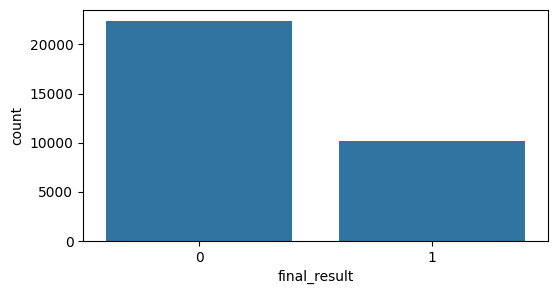

In [ ]:
plt.figure(figsize=(6, 3))
sns.barplot(x=stdInfo['final_result'].value_counts().index, y=stdInfo['final_result'].value_counts())

In [ ]:
stdReg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [ ]:
stdVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [ ]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [ ]:
vle['id_site'].nunique()

6364

In [ ]:
vle['activity_type'].value_counts()

activity_type
resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: count, dtype: int64

In [ ]:
vle_new = vle[vle['activity_type'].isin(['oucontent', 'resource','forumng'])]

In [ ]:
stdInfo_stdVle = pd.merge(stdInfo_new, stdVle, how='left', on=['id_student','code_module','code_presentation']).sort_values(['id_student','code_module','code_presentation'])

In [ ]:
stdInfo_stdVle

,code_module,code_presentation,id_student,region,studied_credits,num_of_prev_attempts,gender_M,age_band_35-55,highest_education_Lower Than A Level,highest_education_HE Qualification,disability_Y,final_result,id_site,date,sum_click
3664366,DDD,2013J,3733,0.300129,60,0,True,False,False,True,False,1,NaN,NaN,NaN
180987,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877049.0,-23.0,1.0
180988,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877053.0,-23.0,16.0
180989,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877044.0,-23.0,1.0
180990,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877079.0,-23.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271303,FFF,2014J,2702660,0.345149,240,0,False,False,True,False,False,1,NaN,NaN,NaN
3664364,DDD,2013B,2707979,0.347569,120,0,False,False,True,False,False,0,NaN,NaN,NaN
3664365,DDD,2013B,2710343,0.355816,60,0,True,False,True,False,False,0,NaN,NaN,NaN
4725395,DDD,2014B,2710343,0.355816,60,1,True,False,True,False,False,0,NaN,NaN,NaN


In [ ]:
stdInfo_stdVle['id_student'].nunique()

28785

In [ ]:
stdInfo_stdVle_vle = pd.merge(stdInfo_stdVle, vle_new, how='inner', on=['code_module','code_presentation','id_site'])

In [ ]:
stdInfo_stdVle_vle = stdInfo_stdVle_vle.sort_values('id_student')

In [ ]:
stdInfo_stdVle_vle

,code_module,code_presentation,id_student,region,studied_credits,num_of_prev_attempts,gender_M,age_band_35-55,highest_education_Lower Than A Level,highest_education_HE Qualification,disability_Y,final_result,id_site,date,sum_click,activity_type,week_from,week_to
21589,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877012.0,119.0,1.0,forumng,NaN,NaN
21584,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877012.0,114.0,1.0,forumng,NaN,NaN
21583,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877012.0,114.0,1.0,forumng,NaN,NaN
74061,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877037.0,118.0,28.0,oucontent,NaN,NaN
21597,AAA,2014J,6516,0.263204,60,0,True,False,False,True,False,0,877012.0,131.0,2.0,forumng,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140165,BBB,2014J,2698588,0.327517,120,0,False,False,False,True,False,0,913466.0,212.0,4.0,forumng,NaN,NaN
2140184,BBB,2014J,2698588,0.327517,120,0,False,False,False,True,False,0,913466.0,240.0,1.0,forumng,NaN,NaN
2151524,BBB,2014J,2698588,0.327517,120,0,False,False,False,True,False,0,913537.0,52.0,1.0,oucontent,4.0,4.0
2232510,BBB,2014J,2698588,0.327517,120,0,False,False,False,True,False,0,913491.0,151.0,17.0,oucontent,NaN,NaN


In [ ]:
df = stdInfo_stdVle_vle.groupby(['id_student','code_module','code_presentation','region','studied_credits','num_of_prev_attempts','gender_M','age_band_35-55','highest_education_Lower Than A Level','highest_education_HE Qualification','disability_Y','activity_type','date','final_result'])\
                       .agg(sum_click = ('sum_click','sum'))
df

sum_click
id_student code_module code_presentation region   studied_credits num_of_prev_attempts gender_M age_band_35-55 highest_education_Lower Than A Level highest_education_HE Qualification disability_Y activity_type date   final_result           
6516       AAA         2014J             0.263204 60              0                    True     False          False                                True                               False        forumng       -22.0  0                  33.0
                                                                                                                                                                                                                  -20.0  0                  13.0
                                                                                                                                                                                                                  -12.0  0                   1.0
                                                                                                                                                                                                                  -6.0   0                  12.0
                                                                                                                                                                                                                  -2.0   0                   2.0
...                                                                                                                                                                                                                                          ...
2698588    BBB         2014J             0.327517 120             0                    False    False          False                                True                               False        resource       212.0 0                   1.0
                                                                                                                                                                                                                   223.0 0                   2.0
                                                                                                                                                                                                                   228.0 0                   1.0
                                                                                                                                                                                                                   231.0 0                   2.0
                                                                                                                                                                                                                   233.0 0                   5.0

[2052332 rows x 1 columns]

In [ ]:
df['sum_click'].dtype

dtype('float64')

In [ ]:
pivoted_df = df.pivot_table(
    index=['id_student','code_module','code_presentation','region','studied_credits','num_of_prev_attempts','gender_M','age_band_35-55','highest_education_Lower Than A Level','highest_education_HE Qualification','disability_Y','activity_type','date','final_result'],
    columns='date',
    values='sum_click',
    aggfunc='sum'
).reset_index()

In [ ]:
pivoted_df = pivoted_df.fillna(0)

In [ ]:
pivoted_df

date,id_student,code_module,code_presentation,region,studied_credits,num_of_prev_attempts,gender_M,age_band_35-55,highest_education_Lower Than A Level,highest_education_HE Qualification,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,6516,AAA,2014J,0.263204,60,0,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6516,AAA,2014J,0.263204,60,0,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6516,AAA,2014J,0.263204,60,0,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6516,AAA,2014J,0.263204,60,0,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6516,AAA,2014J,0.263204,60,0,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052327,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2052328,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2052329,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2052330,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tsf_df = pivoted_df.drop(['id_student','code_module','code_presentation','region','studied_credits','num_of_prev_attempts','gender_M','age_band_35-55','highest_education_Lower Than A Level','highest_education_HE Qualification','disability_Y','activity_type','date'], axis=1)

In [ ]:
tsf_df

date,final_result,-25.0,-24.0,-23.0,-22.0,-21.0,-20.0,-19.0,-18.0,-17.0,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052327,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2052328,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2052329,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2052330,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tsf_df.dtypes

date
final_result      int64
-25.0           float64
-24.0           float64
-23.0           float64
-22.0           float64
                 ...   
265.0           float64
266.0           float64
267.0           float64
268.0           float64
269.0           float64
Length: 296, dtype: object

In [ ]:
import pandas as pd
import numpy as np
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Identify time series columns (assuming they are all the columns with float type which represents days)
time_series_columns = pivoted_df.columns[pivoted_df.dtypes == 'float64']

# Reshape the DataFrame for sktime: transform each row's time series data into a 2D numpy array
X = np.array(pivoted_df[time_series_columns].apply(lambda row: row.values.reshape(1, -1), axis=1).tolist())

y = pivoted_df['final_result'].values  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Time Series Forest classifier
tsf = TimeSeriesForestClassifier()

# Fit the model
tsf.fit(X_train, y_train)

# Predict on the test set
y_pred = tsf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     15131
           1       0.61      0.64      0.62      4237

    accuracy                           0.83     19368
   macro avg       0.75      0.76      0.76     19368
weighted avg       0.83      0.83      0.83     19368



In [ ]:
rf_df = pivoted_df[['id_student','code_module','code_presentation','region','studied_credits','num_of_prev_attempts','gender_M','age_band_35-55','highest_education_Lower Than A Level','highest_education_HE Qualification','disability_Y','activity_type','date','final_result']]
rf_df = rf_df.drop('date', axis=1)
rf_df = pd.get_dummies(rf_df['region',], drop_first=True)
rf_df

date,id_student,code_module,code_presentation,region,studied_credits,num_of_prev_attempts,gender_M,age_band_35-55,highest_education_Lower Than A Level,highest_education_HE Qualification,disability_Y,activity_type,final_result
0,6516,AAA,2014J,0.263204,60,0,True,False,False,True,False,forumng,0
1,6516,AAA,2014J,0.263204,60,0,True,False,False,True,False,forumng,0
2,6516,AAA,2014J,0.263204,60,0,True,False,False,True,False,forumng,0
3,6516,AAA,2014J,0.263204,60,0,True,False,False,True,False,forumng,0
4,6516,AAA,2014J,0.263204,60,0,True,False,False,True,False,forumng,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052327,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,False,resource,0
2052328,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,False,resource,0
2052329,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,False,resource,0
2052330,2698588,BBB,2014J,0.327517,120,0,False,False,False,True,False,resource,0


In [ ]:
# Assuming 'final_result' is your target and the rest are features
X = rf_df.drop(['final_result', 'code_module', 'code_presentation', 'id_student'], axis=1)  # dropping the unique key columns and target
y = rf_df['final_result']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the DataFrame containing feature importances
print(feature_importances)

In [ ]:
X = rf_df.drop(['final_result','id_student','code_module','code_presentation'], axis=1)
y = rf_df['final_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

ValueError: could not convert string to float: 'oucontent'

In [ ]:
stdInfo_stdVle_vle['id_student'].nunique()

In [ ]:
obj_list = []
for i in stdInfo_stdVle_vle.columns:
  if stdInfo_stdVle_vle[i].dtype=='object':
    obj_list.append(i)
print(obj_list)

In [ ]:
for i in obj_list:
  print(i, stdInfo_stdVle_vle[i].nunique())

In [ ]:
# lower bands indicates higher depreviation, and higher bands indicates lower depreviatioin
stdInfo_stdVle_vle['imd_band'].unique()

In [ ]:
stdInfo_assess = pd.merge(stdInfo, assess, how='left', on=['code_module','code_presentation'])

In [ ]:
stdInfo_assess_stdAssess = pd.merge(stdInfo_assess, stdAssess, how='left', on=['id_student','id_assessment'])

In [ ]:
stdInfo_assess_stdAssess.sort_values(['id_student','code_module','code_presentation']).head(20) # date columns is for assessment date

In [ ]:
stdInfo_assess_stdAssess['score'].isnull().sum()

In [ ]:
stdInfo_assess_stdAssess.shape

In [ ]:
stdInfo_assess_stdAssess_stdReg = pd.merge(stdInfo_assess_stdAssess, stdReg, how='left', on=['id_student','code_module','code_presentation'])

In [ ]:
stdInfo_assess_stdAssess_stdReg

In [ ]:
stdInfo_assess_stdAssess_stdReg = stdInfo_assess_stdAssess_stdReg[['id_student','gender','region','highest_education','imd_band','age_band',\
                                                                   'num_of_prev_attempts','studied_credits','disability','final_result','code_module','code_presentation',\
                                                                   'date_registration','date_unregistration','id_assessment','assessment_type','date','weight','date_submitted',\
                                                                   'is_banked','score']]

In [ ]:
stdInfo_assess_stdAssess_stdReg.shape

In [ ]:
stdInfo_assess_stdAssess_stdReg

In [ ]:
stdInfo_assess_stdAssess_stdReg[stdInfo_assess_stdAssess_stdReg['assessment_type']=='Exam']['score'].isnull().sum()

In [ ]:
stdInfo_assess_stdAssess_stdReg[stdInfo_assess_stdAssess_stdReg['assessment_type']=='Exam']['score'].notnull().sum()

In [ ]:
stdInfo_assess_stdAssess_stdReg[(stdInfo_assess_stdAssess_stdReg['assessment_type']=='Exam') & (stdInfo_assess_stdAssess_stdReg['score'].notnull())][['id_student','code_module','code_presentation','final_result','score']].code_module.value_counts()

In [ ]:
stdInfo_assess_stdAssess_stdReg[stdInfo_assess_stdAssess_stdReg['assessment_type']=='Exam'][['assessment_type','score']]

In [ ]:
stdInfo_assess_stdAssess_stdReg[stdInfo_assess_stdAssess_stdReg['final_result']=='Withdrawn'].head(20)

In [ ]:
cumulative_weighted_assessment_score = (
    stdReg[
        (stdReg['code_module'] == "EEE")
        & (stdReg['code_presentation'] == "2014J")
    ][["id_student"]]
    .merge(
        stdAssess.drop(["date_submitted", "is_banked"], axis=1),
        how="inner",
        on="id_student",
    )
    .merge(
        assess[
            (assess['code_module'] == "EEE")
            & (assess['code_presentation'] == "2014J")
        ],
        how="inner",
        on="id_assessment",
    )
    .assign(weighted_score=lambda x: x["score"] * x["weight"] / 100)[
        ["date", "id_student", "weighted_score"]
    ]
    .pivot(index="date", columns="id_student", values="weighted_score")
    .fillna(0)
    .cumsum()
    .T.join(
        stdInfo[
            (stdInfo['code_module'] == "EEE")
            & (stdInfo['code_presentation'] == "2014J")
        ][["id_student", "final_result"]].set_index("id_student")
    )
    .set_index("final_result", append=True)
)

unstacked_cumulative_weighted_assessment_score = (
    cumulative_weighted_assessment_score.unstack()
)

display(cumulative_weighted_assessment_score)

In [ ]:
splitting_values = []

for date in cumulative_weighted_assessment_score.columns:
    df = cumulative_weighted_assessment_score[date]
    index = df.index.get_level_values(1).values
    index[index == "Distinction"] = "Pass"
    index[index == "Withdrawn"] = "Fail"

    unique_values = np.sort(df.unique())
    max_score = 0  # pylint: disable=invalid-name
    result = {}
    for value in unique_values:
        separator = df < value
        # We suppose Fail score < Pass score
        score = (index[separator] == "Fail").sum() + (index[~separator] == "Pass").sum()
        if score > max_score:
            max_score = score
            result = {
                "score": round(
                    max_score / cumulative_weighted_assessment_score.shape[0], 2
                ),
                "separator": value,
            }

    splitting_values.append(result)

splitting_values = pd.DataFrame(
    splitting_values, index=cumulative_weighted_assessment_score.columns.astype(float)
)
display(splitting_values)

In [ ]:
ax = splitting_values["separator"].plot(
    color="black",
    linewidth=4,
    figsize=(8, 6),
    title="Cumulative assessment score by student final_result",
    xlabel="Day",
    ylabel="Cumulative assessment score",
)

mean_and_quartiles = (
    cumulative_weighted_assessment_score.groupby("final_result")
    .agg(
        [
            ("mean", np.mean),
            ("first_quartile", lambda x: np.percentile(x, 25)),
            ("third_quartile", lambda x: np.percentile(x, 75)),
        ]
    )
    .T.reorder_levels(order=[1, 0])
    .unstack()
)


def fill_between_plot(label, color, values):
    """Plots a matplotlib `fill_between` plot in the given axis."""
    ax.plot(values.index.astype(float), values["mean"], label=label, color=color)
    args = [values.index.astype(float), values.first_quartile, values.third_quartile]
    ax.fill_between(*args, color=color, alpha=0.3)


fill_between_plot("Distinction", "green", mean_and_quartiles["Distinction"].T)
fill_between_plot("Pass", "blue", mean_and_quartiles["Pass"].T)
fill_between_plot("Fail", "red", mean_and_quartiles["Fail"].T)
fill_between_plot("Withdrawn", "orange", mean_and_quartiles["Withdrawn"].T)
plt.legend()
plt.show()

In [ ]:
ax = splitting_values["separator"].plot(
    color="black",
    linewidth=4,
    figsize=(8, 6),
    title="Cumulative assessment score by student final_result",
    xlabel="Day",
    ylabel="Cumulative assessment score",
)

mean_and_quartiles = (
    cumulative_weighted_assessment_score.groupby("final_result")
    .agg(
        [
            ("mean", np.mean),
            ("first_quartile", lambda x: np.percentile(x, 0)),
            ("third_quartile", lambda x: np.percentile(x, 100)),
        ]
    )
    .T.reorder_levels(order=[1, 0])
    .unstack()
)

fill_between_plot("Distinction", "green", mean_and_quartiles["Distinction"].T)
fill_between_plot("Pass", "blue", mean_and_quartiles["Pass"].T)
fill_between_plot("Fail", "red", mean_and_quartiles["Fail"].T)
fill_between_plot("Withdrawn", "orange", mean_and_quartiles["Withdrawn"].T)
plt.legend()
plt.show()